# Predicting House Sales Prices

## Import Libraries and Train Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.options.display.max_columns = 999
data = pd.read_csv("train.csv")


In [2]:
data.shape  ## Dimension of the Dataset

(1460, 81)

In [3]:
data.head() ## Sample of the Dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data.info() ## Datatypes of the attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
SalePrice = data['SalePrice']  ## Store the target column into a Variable

# Histogram of Saleprices of Train Dataset

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

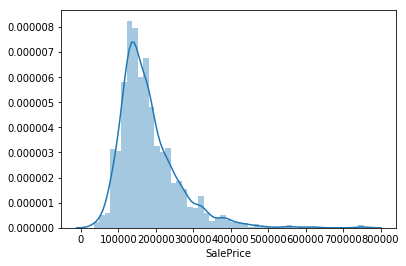

In [6]:
sns.distplot(data['SalePrice'])
data['SalePrice'].describe()

# Converting Object Datatypes into Categorical Datatypes

In [7]:
category_col = data.select_dtypes(include=['object']).columns  ## columns which have object datatypes
category_col

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [8]:
for x in category_col:
    data[x] = data[x].astype('category')  ## converted that object Datatypes into Category datatypes

In [9]:
data['YearBuilt'] = data['YearBuilt'].astype('category')
data['YearRemodAdd'] = data['YearRemodAdd'].astype('category')
data['YrSold'] = data['YrSold'].astype('category')                    ## These are also some categorical datatypes stored in
data['MoSold'] = data['MoSold'].astype('category')                    ##  numeric datatypes.
data['GarageYrBlt'] = data['GarageYrBlt'].astype('category')

In [10]:
data.info()   ## All the object datatypes are changed into Categorical datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null category
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null category
Alley            91 non-null category
LotShape         1460 non-null category
LandContour      1460 non-null category
Utilities        1460 non-null category
LotConfig        1460 non-null category
LandSlope        1460 non-null category
Neighborhood     1460 non-null category
Condition1       1460 non-null category
Condition2       1460 non-null category
BldgType         1460 non-null category
HouseStyle       1460 non-null category
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null category
YearRemodAdd     1460 non-null category
RoofStyle        1460 non-null category
RoofMatl         1460 non-null 

# Handling Missing values


In [11]:
missing = data.isnull()  ## tells about the missing values
missing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False


In [12]:
missing_attribute = missing.sum()  ## Number of missing values in each attribute
missing_attribute

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [13]:
missing_cols = missing_attribute[(missing_attribute > len(data)/20)].sort_values() 
## columns in which missing values are more than 5%
missing_cols

GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
LotFrontage      259
FireplaceQu      690
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64

In [14]:
drop_missing_cols = missing_cols.index
drop_missing_cols     

Index(['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond',
       'LotFrontage', 'FireplaceQu', 'Fence', 'Alley', 'MiscFeature',
       'PoolQC'],
      dtype='object')

In [15]:
data= data.drop(drop_missing_cols , axis=1) ## deleting these attributes

In [16]:
data.shape  ## Dimension of the Dataset

(1460, 70)

In [17]:
num_missing = data.isnull().sum()
fixable_cols = num_missing[(num_missing > 0)].sort_values() ## Now the Columns which have missing values
fixable_cols

Electrical       1
MasVnrType       8
MasVnrArea       8
BsmtQual        37
BsmtCond        37
BsmtFinType1    37
BsmtExposure    38
BsmtFinType2    38
dtype: int64

In [18]:
replacement_values_dict = data[fixable_cols.index].mode().to_dict(orient='records')[0]
replacement_values_dict   ## create a dictionary which contains the mode of the aattributes

{'Electrical': 'SBrkr',
 'MasVnrType': 'None',
 'MasVnrArea': 0.0,
 'BsmtQual': 'TA',
 'BsmtCond': 'TA',
 'BsmtFinType1': 'Unf',
 'BsmtExposure': 'No',
 'BsmtFinType2': 'Unf'}

In [19]:
data = data.fillna(replacement_values_dict) ## impute the missing values with the mode of that particular attribute

In [20]:
data.isnull().sum() ## number of missing values in each attribute

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
                ..
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageCars       0
GarageArea       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch   

# Creating Scatter Plots for Numerical Attributes

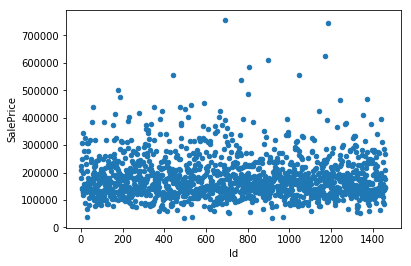

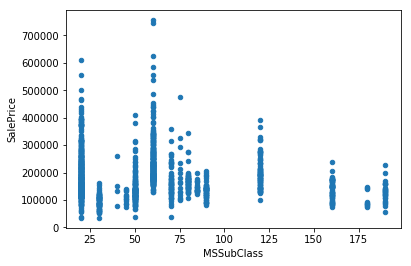

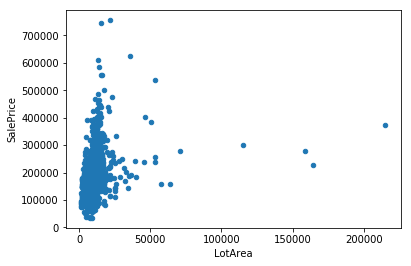

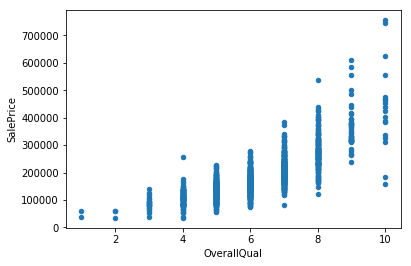

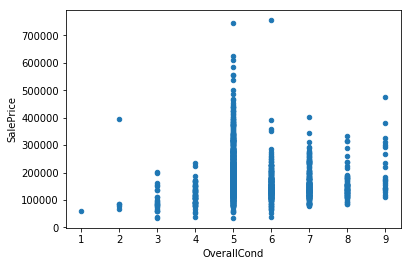

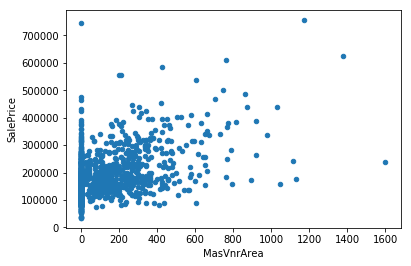

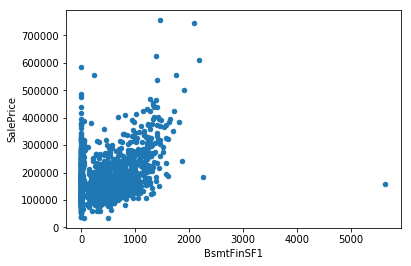

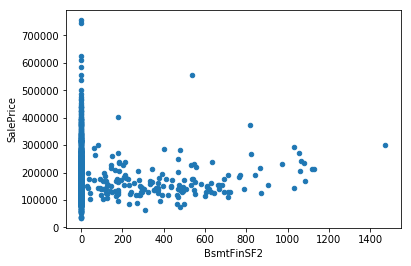

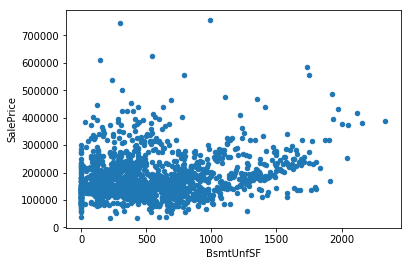

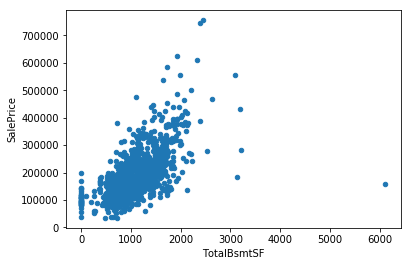

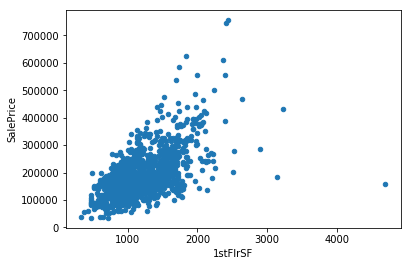

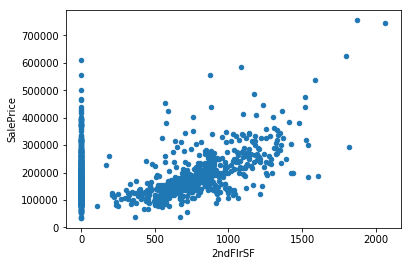

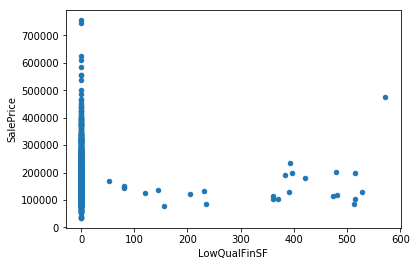

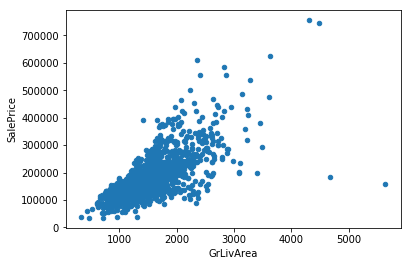

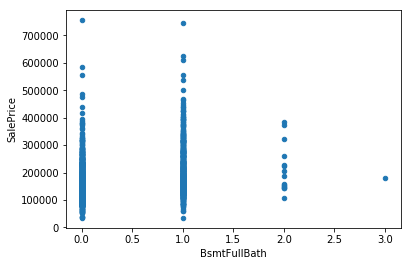

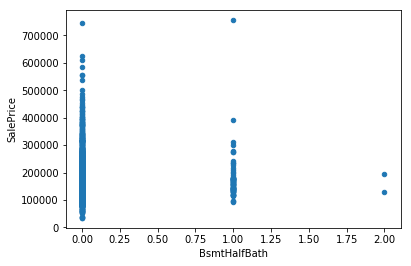

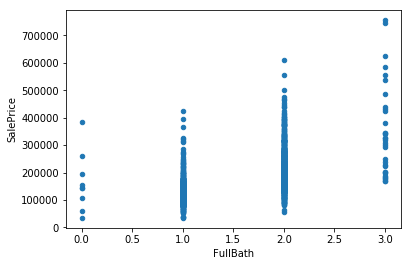

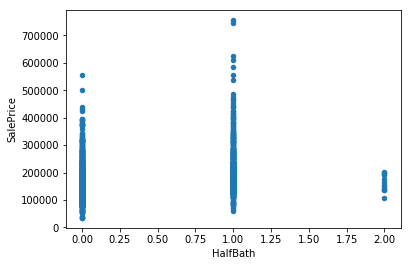

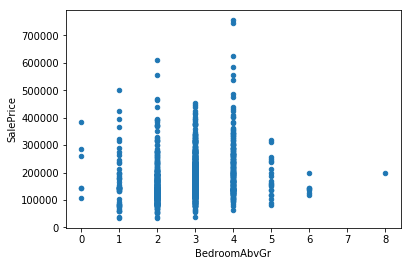

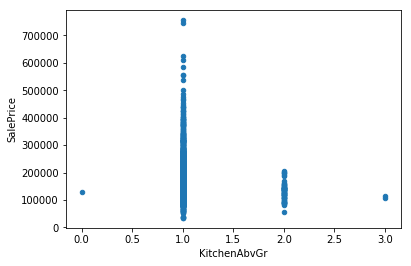

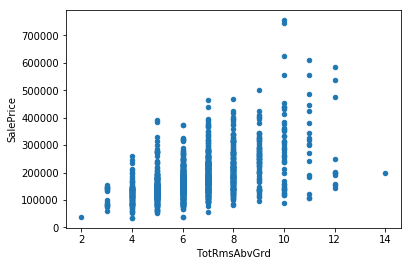

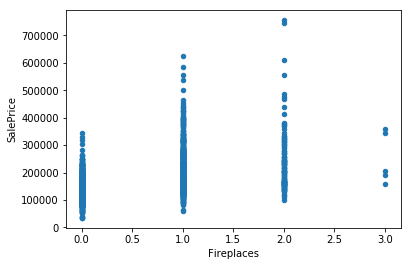

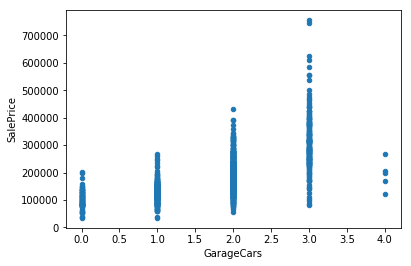

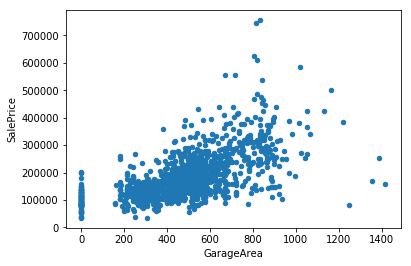

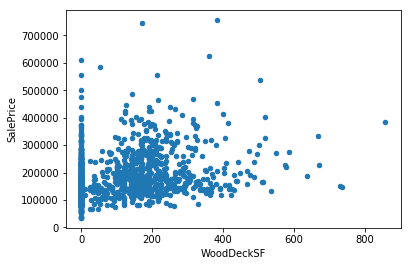

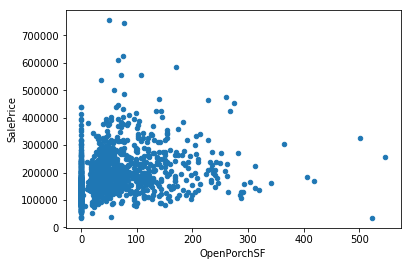

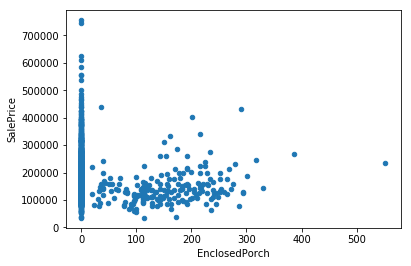

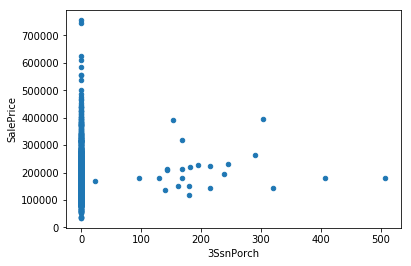

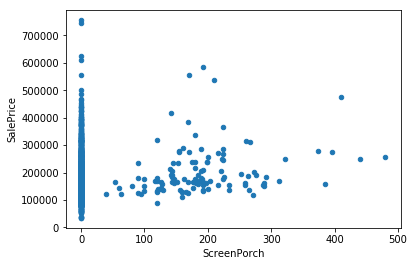

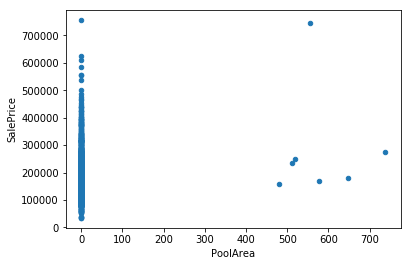

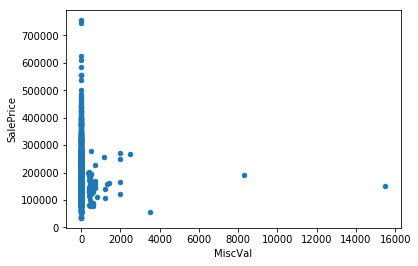

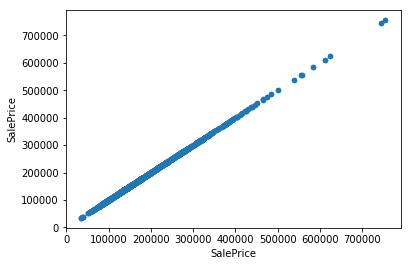

In [21]:
numeric_col = data.select_dtypes(include=['int64', 'float64']).columns
for var in numeric_col:
    df = pd.concat([data['SalePrice'],data[var]],axis =1)
    df.plot.scatter(x = var, y = 'SalePrice')

# Creating Box Plots for Categorical Attributes

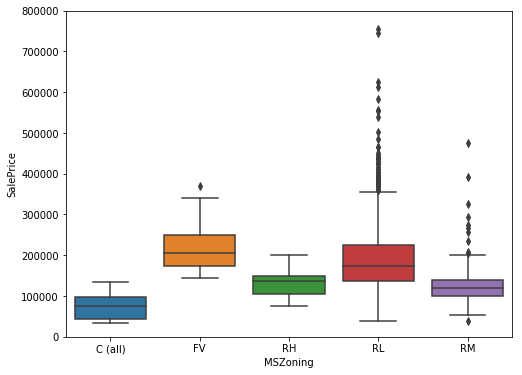

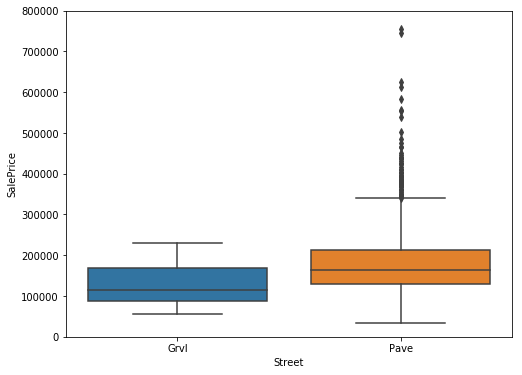

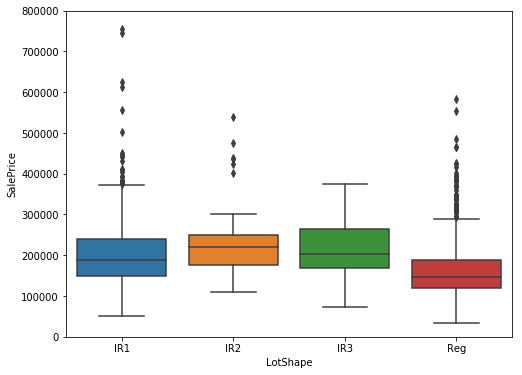

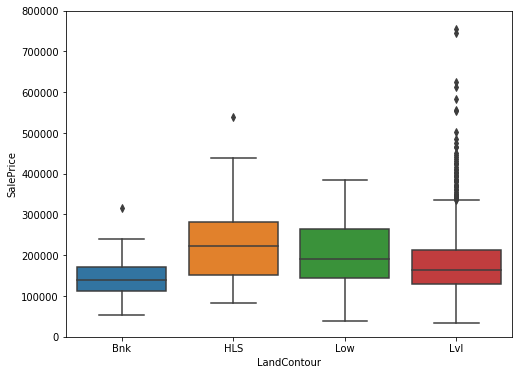

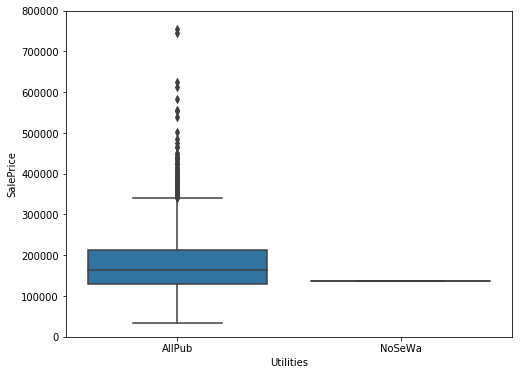

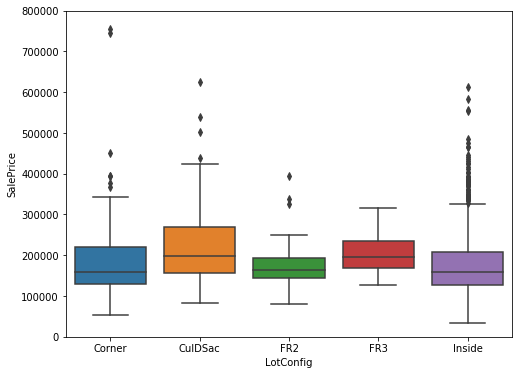

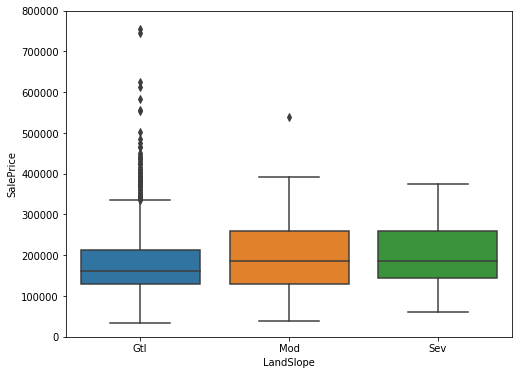

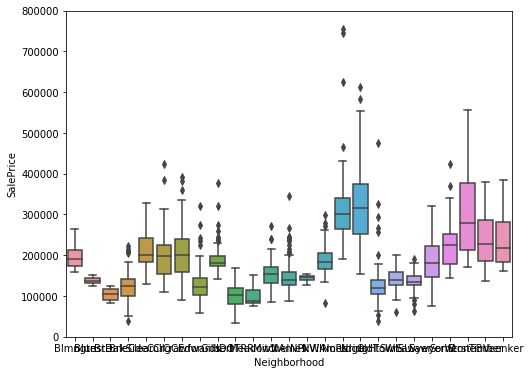

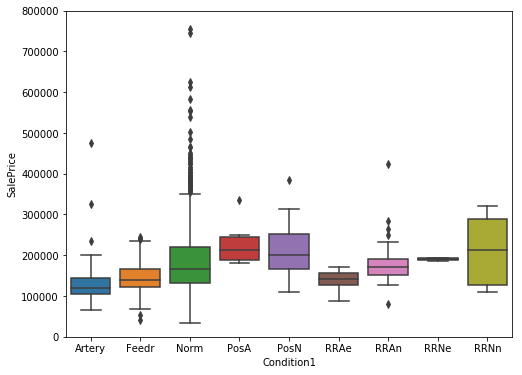

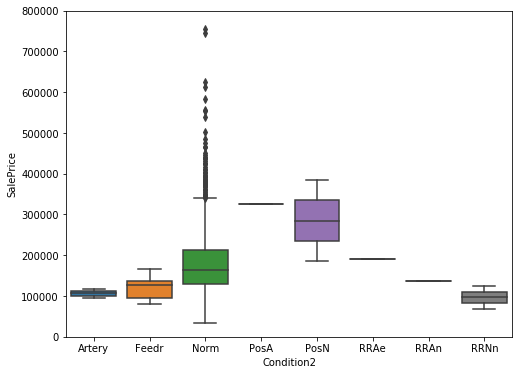

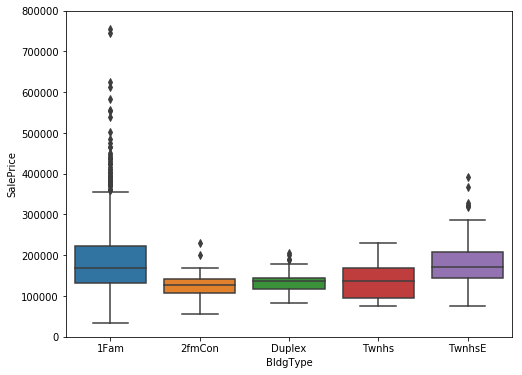

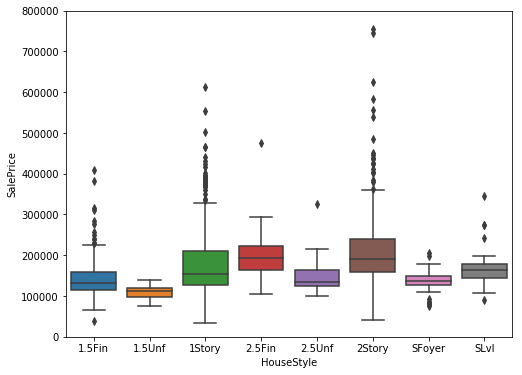

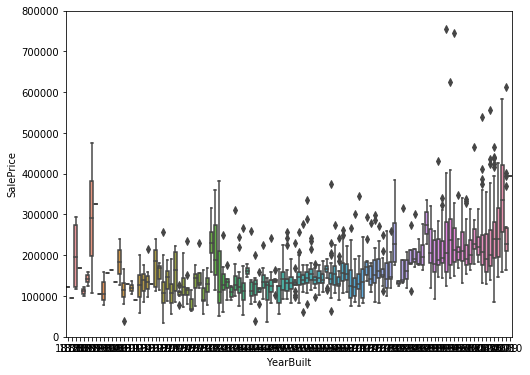

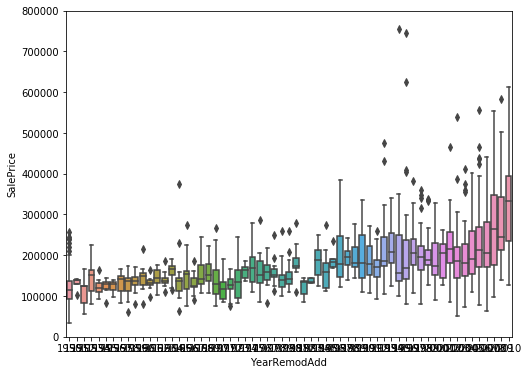

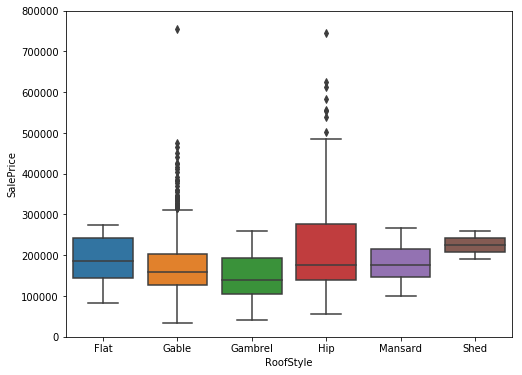

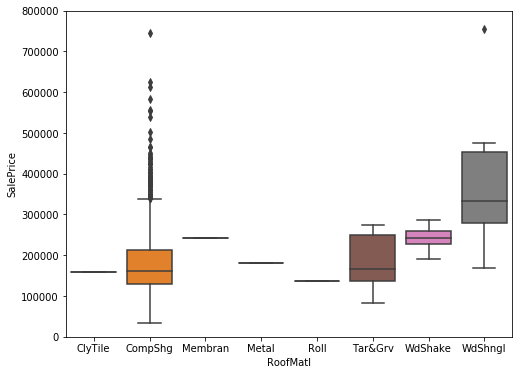

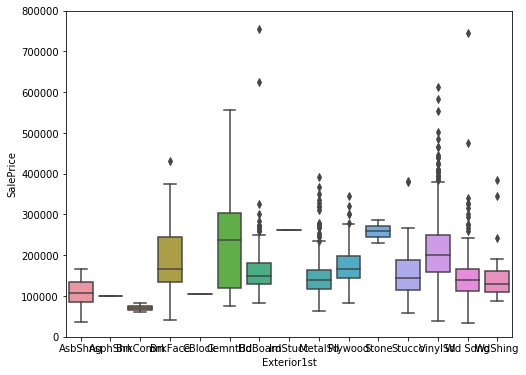

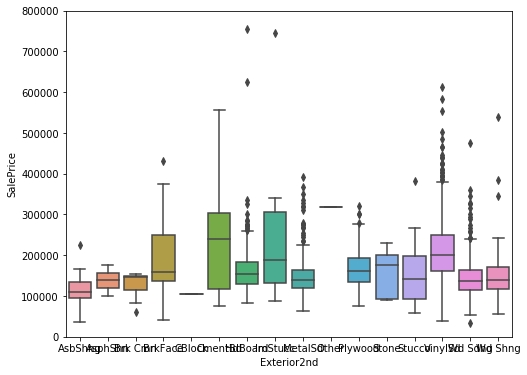

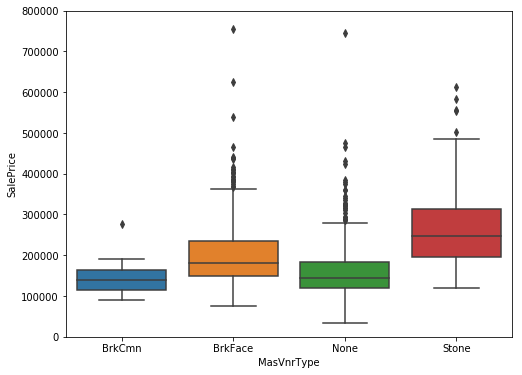

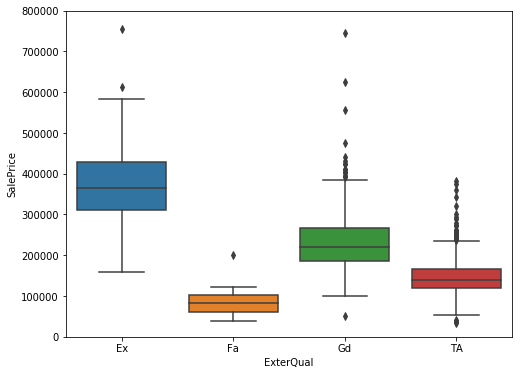

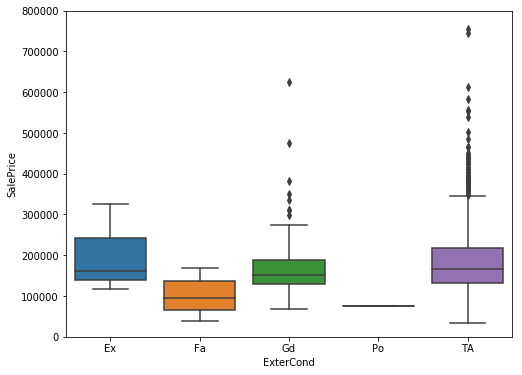

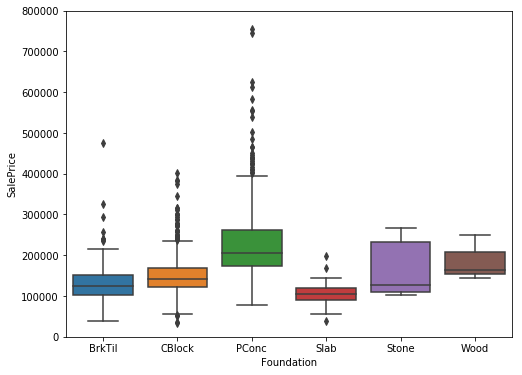

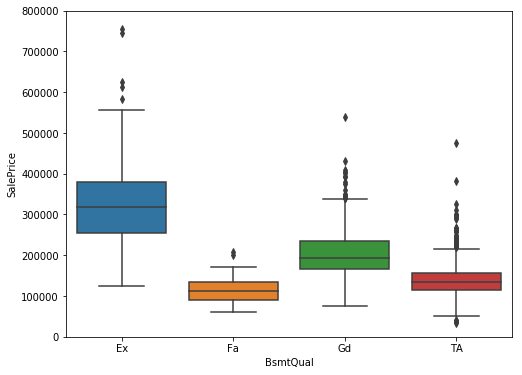

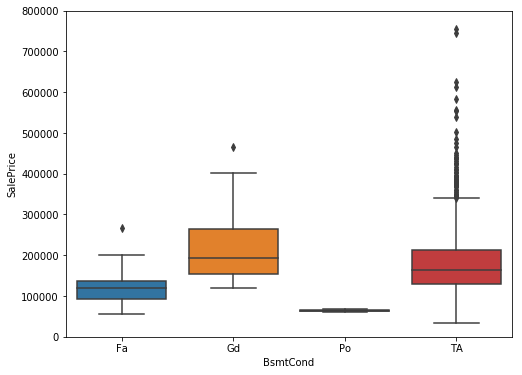

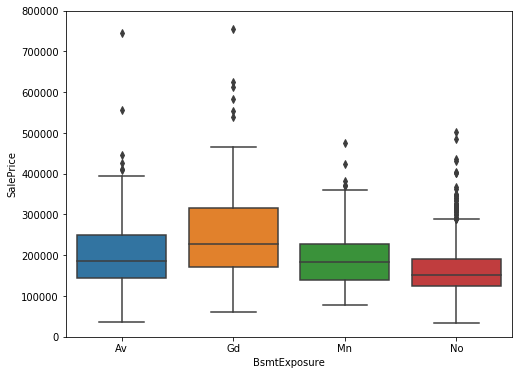

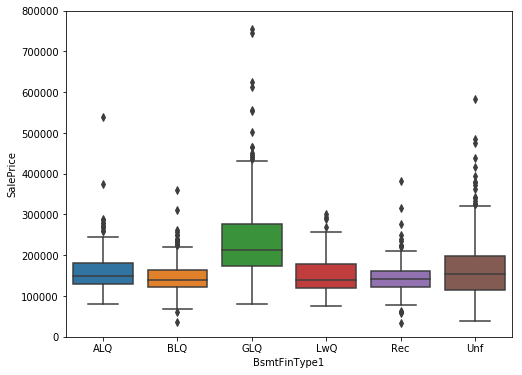

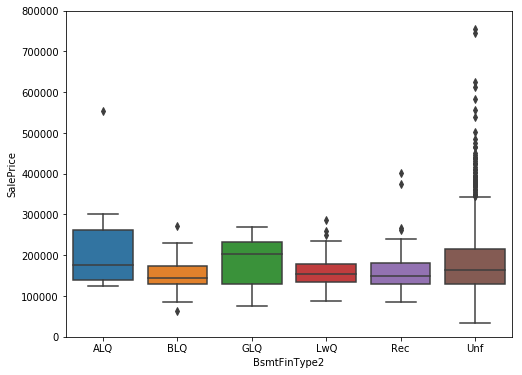

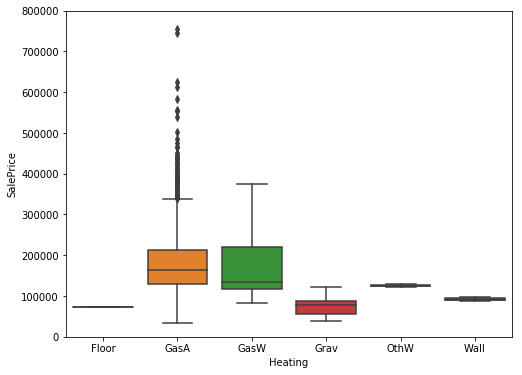

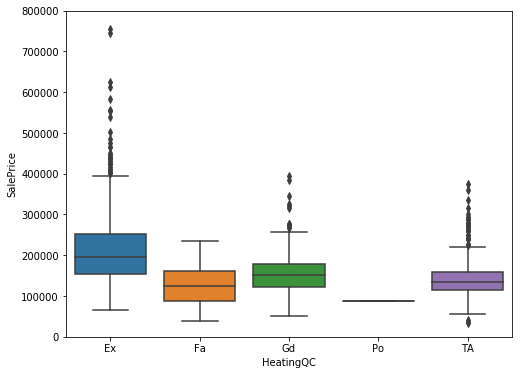

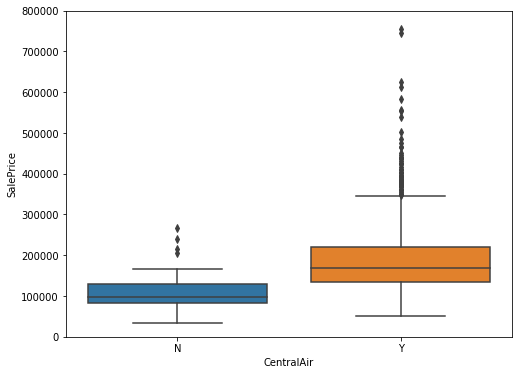

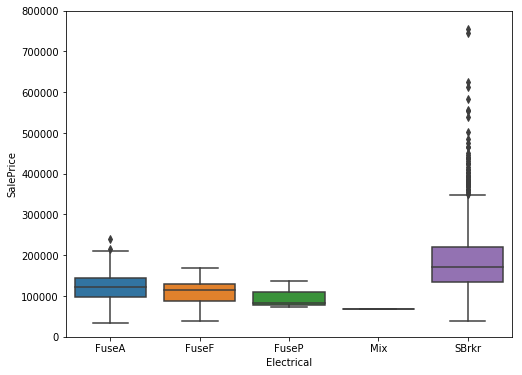

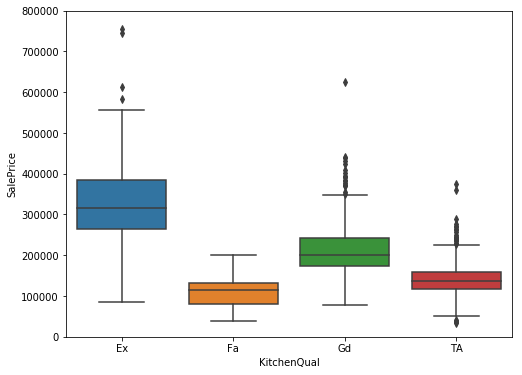

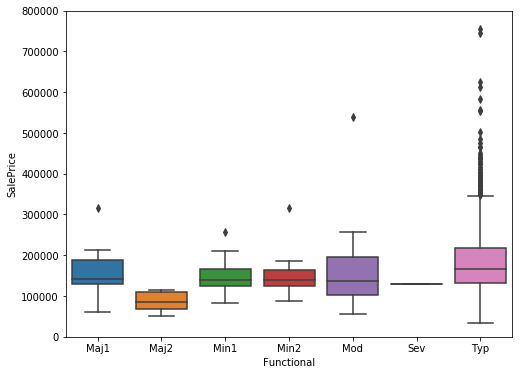

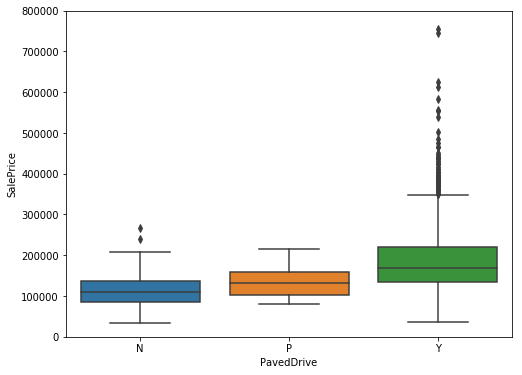

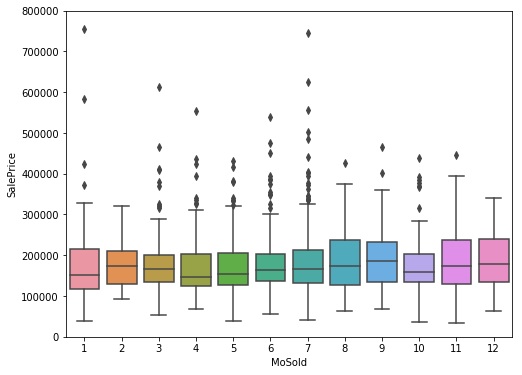

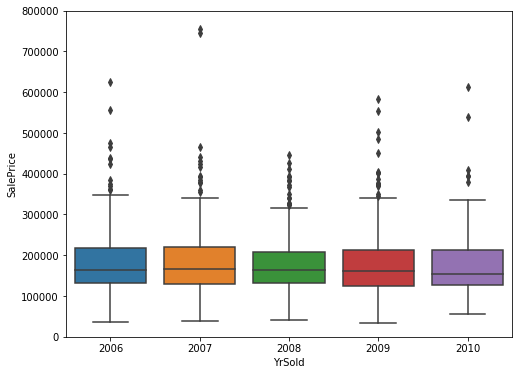

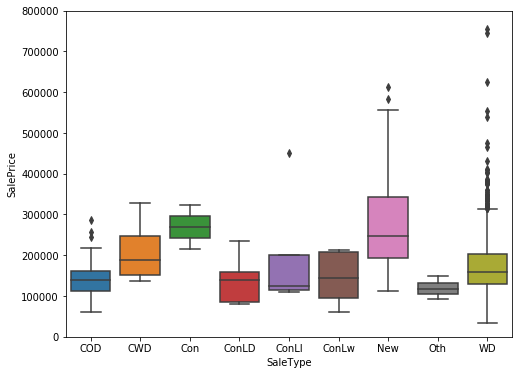

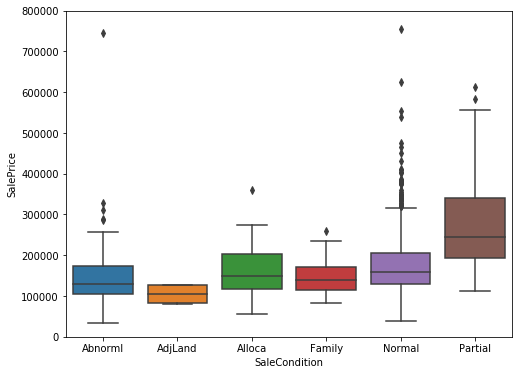

In [22]:
category_col = data.select_dtypes(include = ['category']).columns
for var in category_col:
    df = pd.concat([data['SalePrice'], data[var]], axis=1)
    f, ax = plt.subplots(figsize=(8,6))
    fig = sns.boxplot(x=var, y="SalePrice", data=df)
    fig.axis(ymin=0, ymax=800000)

# Imputing Outliers with Mean of that Outlier

In [23]:
numeric_col.drop('SalePrice')          ## selecting numeric columns to determine outliers

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal'],
      dtype='object')

In [24]:
for x in numeric_col:
    iqr = (data[x].quantile(.75) - data[x].quantile(.25))
    upper_outlier = data[x].quantile(.75) + (iqr*1.5)
    lower_outlier = data[x].quantile(.25) - (iqr*1.5)
    mean = data[x].mean()                                ## imputing the outliers with the mean of that particular attribute
    data[x] = data[x].mask((data[x] < lower_outlier), mean)
    data[x] = data[x].mask((data[x] > upper_outlier), mean)


In [25]:
data

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60.00000,RL,8450.000000,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,5.000000,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000000,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.000000,150.000000,856.000000,GasA,Ex,Y,SBrkr,856.0,854.0,0.000000,1710.0,1.0,0.000000,2,1,3.0,1.000000,Gd,8.000000,Typ,0.0,2.0,548.0,Y,0.000000,61.000000,0.00000,0.000000,0.000000,0.0,0.000000,2,2008,WD,Normal,208500.00000
1,2,20.00000,RL,9600.000000,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6.0,5.575342,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.000000,284.000000,1262.000000,GasA,Ex,Y,SBrkr,1262.0,0.0,0.000000,1262.0,0.0,0.057534,2,0,3.0,1.000000,TA,6.000000,Typ,1.0,2.0,460.0,Y,298.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,5,2007,WD,Normal,181500.00000
2,3,60.00000,RL,11250.000000,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,5.000000,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.000000,434.000000,920.000000,GasA,Ex,Y,SBrkr,920.0,866.0,0.000000,1786.0,1.0,0.000000,2,1,3.0,1.000000,Gd,6.000000,Typ,1.0,2.0,608.0,Y,0.000000,42.000000,0.00000,0.000000,0.000000,0.0,0.000000,9,2008,WD,Normal,223500.00000
3,4,70.00000,RL,9550.000000,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7.0,5.000000,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.000000,540.000000,756.000000,GasA,Gd,Y,SBrkr,961.0,756.0,0.000000,1717.0,1.0,0.000000,1,0,3.0,1.000000,Gd,7.000000,Typ,1.0,3.0,642.0,Y,0.000000,35.000000,21.95411,0.000000,0.000000,0.0,0.000000,2,2006,WD,Abnorml,140000.00000
4,5,60.00000,RL,14260.000000,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8.0,5.000000,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000000,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.000000,490.000000,1145.000000,GasA,Ex,Y,SBrkr,1145.0,1053.0,0.000000,2198.0,1.0,0.000000,2,1,4.0,1.000000,Gd,9.000000,Typ,1.0,3.0,836.0,Y,192.000000,84.000000,0.00000,0.000000,0.000000,0.0,0.000000,12,2008,WD,Normal,250000.00000
5,6,50.00000,RL,14115.000000,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5.0,5.000000,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.000000,TA,TA,Wood,Gd,TA,No,GLQ,732.0,Unf,0.000000,64.000000,796.000000,GasA,Ex,Y,SBrkr,796.0,566.0,0.000000,1362.0,1.0,0.000000,1,1,1.0,1.000000,TA,5.000000,Typ,0.0,2.0,480.0,Y,40.000000,30.000000,0.00000,3.409589,0.000000,0.0,43.489041,10,2009,WD,Normal,143000.00000
6,7,20.00000,RL,10084.000000,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8.0,5.000000,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.000000,Gd,TA,PConc,Ex,TA,Av,GLQ,1369.0,Unf,0.000000,317.000000,1686.000000,GasA,Ex,Y,SBrkr,1694.0,0.0,0.000000,1694.0,1.0,0.000000,2,0,3.0,1.000000,Gd,7.000000,Typ,1.0,2.0,636.0,Y,255.000000,57.000000,0.00000,0.000000,0.000000,0.0,0.000000,8,2007,WD,Normal,307000.00000
7,8,60.00000,RL,10382.000000,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7.0,6.000000,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.000000,TA,TA,CBlock,Gd,TA,Mn,ALQ,859.0,BLQ,46.549315,216.000000,1107.000000,GasA,Ex,Y,SBrkr,1107.0,983.0,0.000000,2090.0,1.0,0.000000,2,1,3.0,1.000000,TA,7.00000

# Normalizing Numerical Attributes

In [26]:
normalizing_col = list(data.select_dtypes(include=['int64', 'float64']).columns)
normalizing_col.remove('Id')
normalizing_col.remove('SalePrice')
## list of numerical attributes

In [27]:
for x in normalizing_col:
    maximum = data[x].max()
    minimum = data[x].min()                                           ## Normalizing the numerical attributes
    data[x] = data[x].apply(lambda x : (x-minimum)/(maximum-minimum))

data

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,0.400000,RL,0.430099,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,0.625,0.333333,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,0.478049,Gd,TA,PConc,Gd,TA,No,GLQ,0.399547,Unf,0.0,0.089286,0.386914,GasA,Ex,Y,SBrkr,0.289678,0.469747,0.0,0.574290,0.5,0.0,0.666667,0.5,0.666667,0.0,Gd,0.750000,Typ,0.0,0.666667,0.585470,Y,0.000000,0.358824,0.0,0.0,0.0,0.0,0.0,2,2008,WD,Normal,208500.00000
1,2,0.000000,RL,0.501174,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,0.500,0.525114,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,0.553480,Unf,0.0,0.169048,0.596084,GasA,Ex,Y,SBrkr,0.514983,0.000000,0.0,0.387312,0.0,1.0,0.666667,0.0,0.666667,0.0,TA,0.500000,Typ,0.5,0.666667,0.491453,Y,0.712919,0.000000,0.0,0.0,0.0,0.0,0.0,5,2007,WD,Normal,181500.00000
2,3,0.400000,RL,0.603152,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,0.625,0.333333,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,0.395122,Gd,TA,PConc,Gd,TA,Mn,GLQ,0.275042,Unf,0.0,0.258333,0.419887,GasA,Ex,Y,SBrkr,0.325194,0.476348,0.0,0.606010,0.5,0.0,0.666667,0.5,0.666667,0.0,Gd,0.500000,Typ,0.5,0.666667,0.649573,Y,0.000000,0.247059,0.0,0.0,0.0,0.0,0.0,9,2008,WD,Normal,223500.00000
3,4,0.500000,RL,0.498084,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,0.625,0.333333,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,0.122241,Unf,0.0,0.321429,0.335394,GasA,Gd,Y,SBrkr,0.347947,0.415842,0.0,0.577212,0.5,0.0,0.333333,0.0,0.666667,0.0,Gd,0.625000,Typ,0.5,1.000000,0.685897,Y,0.000000,0.205882,1.0,0.0,0.0,0.0,0.0,2,2006,WD,Abnorml,140000.00000
4,5,0.400000,RL,0.789184,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,0.750,0.333333,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,0.853659,Gd,TA,PConc,Gd,TA,Av,GLQ,0.370685,Unf,0.0,0.291667,0.535806,GasA,Ex,Y,SBrkr,0.450055,0.579208,0.0,0.777963,0.5,0.0,0.666667,0.5,1.000000,0.0,Gd,0.875000,Typ,0.5,1.000000,0.893162,Y,0.459330,0.494118,0.0,0.0,0.0,0.0,0.0,12,2008,WD,Normal,250000.00000
5,6,0.300000,RL,0.780222,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,0.375,0.333333,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.000000,TA,TA,Wood,Gd,TA,No,GLQ,0.414261,Unf,0.0,0.038095,0.356002,GasA,Ex,Y,SBrkr,0.256382,0.311331,0.0,0.429048,0.5,0.0,0.333333,0.5,0.000000,0.0,TA,0.375000,Typ,0.0,0.666667,0.512821,Y,0.095694,0.176471,0.0,1.0,0.0,0.0,1.0,10,2009,WD,Normal,143000.00000
6,7,0.000000,RL,0.531088,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,0.750,0.333333,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,0.453659,Gd,TA,PConc,Ex,TA,Av,GLQ,0.774759,Unf,0.0,0.188690,0.814529,GasA,Ex,Y,SBrkr,0.754717,0.000000,0.0,0.567613,0.5,0.0,0.666667,0.0,0.666667,0.0,Gd,0.625000,Typ,0.5,0.666667,0.679487,Y,0.610048,0.335294,0.0,0.0,0.0,0.0,0.0,8,2007,WD,Normal,307000.00000
7,8,0.400000,RL,0.549506,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,0.625,0.666667,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,0.585366,TA,TA,CBlock,Gd,TA,Mn,ALQ,0.486135,BLQ,1.0,0.128571,0.516229,GasA,Ex,Y,SBrkr,0.428968,0.540704,0.0,0.732888,0.5,0.0,0.666667,0.5,0.666667,0.0,TA,0.625000,Typ,1.0,0.666667,0.517094,Y,0.562201,0.274472,1.0,0.0,0.0,0.0,1.0,11,2009,WD,Normal,200000.00000
8,9,0.300000,R

# Correlation Matrix and Heatmap

In [28]:
data.corr() ## correlation between each attribute

,Id,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
Id,1.000000,0.022413,-0.009397,-0.031967,-0.005077,-0.028496,-0.009050,-0.006599,-0.001118,-0.030201,0.009327,0.002941,-0.028041,-0.008597,0.002239,-0.021542,0.005587,0.006784,0.040959,0.011190,0.004642,-0.016385,0.009925,0.002026,-0.047017,-0.018874,-0.009401,-0.036527,0.006989,0.055511,-0.044440,-0.013016
MSSubClass,0.022413,1.000000,-0.264979,0.152813,-0.126880,0.033740,-0.045051,-0.077017,-0.049105,-0.132400,-0.112296,0.334799,0.041063,0.186902,0.007388,0.019845,0.192979,0.200643,-0.034660,0.233591,0.122812,0.069238,0.071128,0.000749,0.041493,0.036130,-0.010266,-0.015813,0.014340,0.032629,-0.036972,0.098042
LotArea,-0.009397,-0.264979,1.000000,0.235201,-0.021333,0.118492,0.180181,0.055087,0.058520,0.340142,0.408506,0.094798,-0.035070,0.375740,0.087119,0.039959,0.206888,0.098246,0.321131,-0.015797,0.376880,0.304796,0.304649,0.322910,0.166322,0.146639,-0.056166,0.039160,0.079746,0.058810,0.048962,0.384240
OverallQual,-0.031967,0.152813,0.235201,1.000000,-0.216323,0.330116,0.200492,-0.108031,0.244666,0.447696,0.434163,0.282459,-0.029358,0.553399,0.116618,-0.044999,0.545946,0.277234,0.131703,-0.188029,0.412952,0.389268,0.608990,0.548566,0.256550,0.382446,-0.168995,0.025364,0.043770,0.074252,-0.090473,0.722377
OverallCond,-0.005077,-0.126880,-0.021333,-0.216323,1.000000,-0.149485,-0.041250,0.105716,-0.133391,-0.228602,-0.156200,-0.048220,0.046127,-0.159064,-0.037706,0.072871,-0.265912,-0.089766,-0.012481,-0.097923,-0.116516,-0.043734,-0.258961,-0.206059,-0.055526,-0.159767,0.118320,0.035327,0.091083,-0.003178,0.088504,-0.153937
MasVnrArea,-0.028496,0.033740,0.118492,0.330116,-0.149485,1.000000,0.197680,-0.052001,0.058546,0.283909,0.271092,0.089822,-0.089897,0.276772,0.084710,0.032057,0.215609,0.163129,0.132068,-0.020281,0.222387,0.206004,0.327503,0.318908,0.145665,0.146837,-0.146067,0.035660,0.026350,-0.009169,-0.057353,0.333480
BsmtFinSF1,-0.009050,-0.045051,0.180181,0.200492,-0.041250,0.197680,1.000000,0.010313,-0.521001,0.388227,0.358549,-0.177775,-0.073103,0.100428,0.652383,0.080730,0.042175,-0.015250,-0.083236,-0.071498,-0.005131,0.222287,0.216162,0.258193,0.198322,0.072359,-0.147815,0.039085,0.081656,0.020236,-0.001726,0.294704
BsmtFinSF2,-0.006599,-0.077017,0.055087,-0.108031,0.105716,-0.052001,0.010313,1.000000,-0.238851,0.024364,0.036263,-0.094317,0.000424,-0.042541,0.147539,0.127309,-0.099121,-0.046833,0.009618,-0.038583,-0.056822,0.036278,-0.049250,0.000352,0.075157,-0.083139,0.038223,-0.012612,0.053565,0.068517,0.035439,-0.038371
BsmtUnfSF,-0.001118,-0.049105,0.058520,0.244666,-0.133391,0.058546,-0.521001,-0.238851,1.000000,0.280381,0.222983,0.036302,0.014354,0.201303,-0.416952,-0.094706,0.247675,-0.033642,0.139764,0.005360,0.224463,0.039790,0.170818,0.135152,-0.041959,0.126148,0.020041,0.017216,-0.038352,-0.036625,-0.049105,0.186044
TotalBsmtSF,-0.030201,-0.132400,0.340142,0.447696,-0.228602,0.283909,0.388227,0.024364,0.280381,1.000000,0.830448,-0.264029,-0.070786,0.328944,0.255739,-0.014890,0.346402,-0.149751,0.055494,0.070234,0.237805,0.281778,0.443766,0.460588,0.196374,0.220449,-0.174671,0.055000,0.067609,0.008225,-0.053192,0.532168


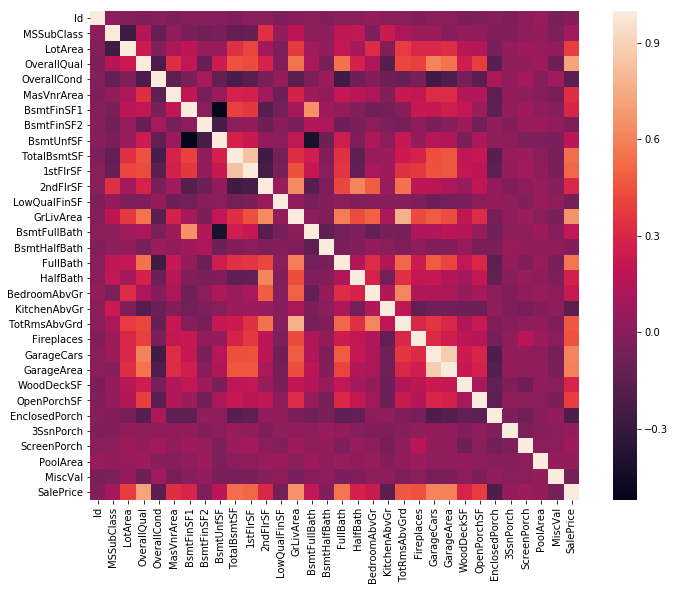

In [29]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, square=True)

# Data Reduction

In [30]:
category_df = data.select_dtypes(include=['category']).columns
data[category_df].nunique()  ## number of unique values in categorical data types

MSZoning           5
Street             2
LotShape           4
LandContour        4
Utilities          2
LotConfig          5
LandSlope          3
Neighborhood      25
Condition1         9
Condition2         8
BldgType           5
HouseStyle         8
YearBuilt        112
YearRemodAdd      61
RoofStyle          6
RoofMatl           8
Exterior1st       15
Exterior2nd       16
MasVnrType         4
ExterQual          4
ExterCond          5
Foundation         6
BsmtQual           4
BsmtCond           4
BsmtExposure       4
BsmtFinType1       6
BsmtFinType2       6
Heating            6
HeatingQC          5
CentralAir         2
Electrical         5
KitchenQual        4
Functional         7
PavedDrive         3
MoSold            12
YrSold             5
SaleType           9
SaleCondition      6
dtype: int64

In [31]:
cat_cols = data[category_df].nunique()  
drop_col = cat_cols[cat_cols>10].index   ## Deleting the categorical attributes which have more than 10 unique values
data= data.drop(drop_col , axis=1)

In [32]:
data.shape

(1460, 64)

# Data Transformation with Dummy Variables

In [33]:
text_cols = data.select_dtypes(include=['category'])
data = pd.concat([
    data,                                                      ## create dummy variable of categorical attribute
    pd.get_dummies(data.select_dtypes(include=['category']))
], axis=1).drop(text_cols,axis=1)

In [34]:
data.shape ## total number of attributes increased due to dummy variables

(1460, 196)

# Data Reduction by Feature Engineering

In [35]:
correlations = data.corr()['SalePrice'].abs().sort_values()
corr_cols = list(correlations[correlations<.3].index)      ## columns which have correlation between -.3 and .3 with SalePrice
corr_cols.remove('Id')                   

In [36]:
data= data.drop(corr_cols , axis=1) ## deleting these attributes

In [37]:
list(data.columns) ## dimension of the dataset

['Id',
 'LotArea',
 'OverallQual',
 'MasVnrArea',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'OpenPorchSF',
 'SalePrice',
 'MSZoning_RM',
 'MasVnrType_None',
 'ExterQual_Gd',
 'ExterQual_TA',
 'Foundation_CBlock',
 'Foundation_PConc',
 'BsmtQual_Ex',
 'BsmtQual_Gd',
 'BsmtQual_TA',
 'BsmtFinType1_GLQ',
 'HeatingQC_Ex',
 'HeatingQC_TA',
 'KitchenQual_Gd',
 'KitchenQual_TA']

# Preprocessed Train Data

In [38]:
preprocessed_train_data = data

# Creating & Fitting Linear Regression Model on Validation Dataset

## Finding mean square error(MSE), root mean square error(RMSE) and root mean square log error(RMSLE)

In [39]:
from sklearn.model_selection import KFold
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_log_error

train = data[:730]
test = data[730:]
numeric_train = train.select_dtypes(include=['integer', 'float','category'])
numeric_test = test.select_dtypes(include=['integer', 'float','category'])
    
    ## You can use `pd.Series.drop()` to drop a value.
features = numeric_train.columns.drop(["SalePrice",'Id'])
lr = linear_model.LinearRegression()
lr.fit(train[features], train["SalePrice"])
predictions = lr.predict(test[features])
mse = mean_squared_error(test["SalePrice"], predictions)
print(mse)
rmse = np.sqrt(mse)
print(rmse)
rmsle = np.sqrt(mean_squared_log_error( test["SalePrice"], predictions ))
print(rmsle)

770395591.3815832
27756.000997650637
0.15507435047552298


# Creating & Fitting Decision Tree Model on Validation Dataset
## Finding mean square error(MSE), root mean square error(RMSE) and root mean square log error(RMSLE)

In [40]:
from sklearn.tree import DecisionTreeRegressor
train = data[:730]
test = data[730:]
predictors = list(data.columns)
predictors.remove("SalePrice")
predictors.remove("Id")


reg = DecisionTreeRegressor(min_samples_leaf=5)

reg.fit(train[predictors], train["SalePrice"])

predictions = reg.predict(test[predictors])
mse = mean_squared_error(test["SalePrice"], predictions)
print(mse)
rmse = np.sqrt(mse)
print(rmse)
rmsle = np.sqrt(mean_squared_log_error( test["SalePrice"], predictions ))
print(rmsle)

1081475799.526878
32885.79935970659
0.1929156253471434


# Creating & Fitting Random Forest Model on Validation Dataset
## Finding mean square error(MSE), root mean square error(RMSE) and root mean square log error(RMSLE)

In [41]:
from sklearn.ensemble import RandomForestRegressor
train = data[:730]
test = data[730:]
predictors = list(data.columns)
predictors.remove("SalePrice")
predictors.remove("Id")

reg = RandomForestRegressor(min_samples_leaf=5)
reg.fit(train[predictors], train["SalePrice"])

predictions = reg.predict(test[predictors])
mse = mean_squared_error(test["SalePrice"], predictions)
print(mse)
rmse = np.sqrt(mse)
print(rmse)
rmsle = np.sqrt(mean_squared_log_error( test["SalePrice"], predictions ))
print(rmsle)

749495859.4650863
27376.922023213025
0.16426065790704403


# Importing and Preprocessing of Test Dataset

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_columns = 999
data = pd.read_csv("test.csv")
category_col = data.select_dtypes(include=['object']).columns  ## columns which have object datatypes
for x in category_col:
    data[x] = data[x].astype('category')  ## converted that object Datatypes into Category datatypes
data['YearBuilt'] = data['YearBuilt'].astype('category')
data['YearRemodAdd'] = data['YearRemodAdd'].astype('category')
data['YrSold'] = data['YrSold'].astype('category')                    ## These are also some categorical datatypes stored in
data['MoSold'] = data['MoSold'].astype('category')                    ##  numeric datatypes.
data['GarageYrBlt'] = data['GarageYrBlt'].astype('category')
missing = data.isnull()  ## tells about the missing values
missing_attribute = missing.sum()  ## Number of missing values in each attribute
missing_cols = missing_attribute[(missing_attribute > len(data)/20)].sort_values() 
## columns in which missing values are more than 5%
drop_missing_cols = missing_cols.index
data= data.drop(drop_missing_cols , axis=1) ## deleting these attributes
num_missing = data.isnull().sum()
fixable_cols = num_missing[(num_missing > 0)].sort_values() ## Now the Columns which have missing values
replacement_values_dict = data[fixable_cols.index].mode().to_dict(orient='records')[0]
replacement_values_dict   ## create a dictionary which contains the mode of the aattributes
data = data.fillna(replacement_values_dict) ## impute the missing values with the mode of that particular attribute
data.isnull().sum() ## number of missing values in each attribute
numeric_col = data.select_dtypes(include=['int64', 'float64']).columns
for x in numeric_col:
    iqr = (data[x].quantile(.75) - data[x].quantile(.25))
    upper_outlier = data[x].quantile(.75) + (iqr*1.5)
    lower_outlier = data[x].quantile(.25) - (iqr*1.5)
    mean = data[x].mean()                                ## imputing the outliers with the mean of that particular attribute
    data[x] = data[x].mask((data[x] < lower_outlier), mean)
    data[x] = data[x].mask((data[x] > upper_outlier), mean)
normalizing_col = list(data.select_dtypes(include=['int64', 'float64']).columns)
normalizing_col.remove('Id')
for x in normalizing_col:
    maximum = data[x].max()
    minimum = data[x].min()                                           ## Normalizing the numerical attributes
    data[x] = data[x].apply(lambda x : (x-minimum)/(maximum-minimum))

category_df = data.select_dtypes(include=['category']).columns
data[category_df].nunique()  ## number of unique values in categorical data types
cat_cols = data[category_df].nunique()  
drop_col = cat_cols[cat_cols>10].index   ## Deleting the categorical attributes which have more than 10 unique values
data= data.drop(drop_col , axis=1)
text_cols = data.select_dtypes(include=['category'])
data = pd.concat([
    data,                                                      ## create dummy variable of categorical attribute
    pd.get_dummies(data.select_dtypes(include=['category']))
], axis=1).drop(text_cols,axis=1)
data = data[['Id',
 'LotArea',
 'OverallQual',
 'MasVnrArea',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'OpenPorchSF',
 'MSZoning_RM',
 'MasVnrType_None',
 'ExterQual_Gd',
 'ExterQual_TA',
 'Foundation_CBlock',
 'Foundation_PConc',
 'BsmtQual_Ex',
 'BsmtQual_Gd',
 'BsmtQual_TA',
 'BsmtFinType1_GLQ',
 'HeatingQC_Ex',
 'HeatingQC_TA',
 'KitchenQual_Gd',
 'KitchenQual_TA']]      

preprocessed_test_data = data

# Creating & Fitting Linear Regression Model on Test Dataset

## Saved the predictions and submitted into kaggle
##  Histogram of predictions

skewness: 0.167782
kurtosis: -0.755855


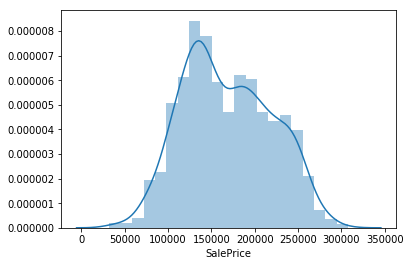

In [43]:
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_log_error

train = preprocessed_train_data
test = preprocessed_test_data
numeric_train = train.select_dtypes(include=['integer', 'float','category'])
numeric_test = test.select_dtypes(include=['integer', 'float','category'])
    
    ## You can use `pd.Series.drop()` to drop a value.
features = numeric_train.columns.drop(["SalePrice",'Id'])
lr = linear_model.LinearRegression()
lr.fit(train[features], train["SalePrice"])
predictions = lr.predict(test[features])
preprocessed_test_data['SalePrice'] = predictions
submit_lr = preprocessed_test_data[['Id','SalePrice']]
submit_lr.to_csv("LR.csv", sep = ',', index=False)

sns.distplot(submit_lr['SalePrice'])
print("skewness: %f" % submit_lr['SalePrice'].skew())
print("kurtosis: %f" %submit_lr['SalePrice'].kurtosis())

# Creating & Fitting Decision Tree Model on Test Dataset

## Saved the predictions and submitted into kaggle
##  Histogram of predictions

skewness: 0.574726
kurtosis: -0.342983


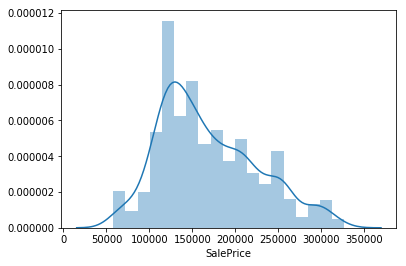

In [44]:
from sklearn.tree import DecisionTreeRegressor
train = preprocessed_train_data
test = preprocessed_test_data
predictors = list(train.columns)
predictors.remove("SalePrice")
predictors.remove("Id")


reg = DecisionTreeRegressor(min_samples_leaf=5)

reg.fit(train[predictors], train["SalePrice"])

predictions = reg.predict(test[predictors])

preprocessed_test_data['SalePrice'] = predictions
submit_dt = preprocessed_test_data[['Id','SalePrice']]
submit_dt.to_csv("DT.csv", sep = ',', index=False)

sns.distplot(submit_dt['SalePrice'])
print("skewness: %f" % submit_dt['SalePrice'].skew())
print("kurtosis: %f" %submit_dt['SalePrice'].kurtosis())

# Creating & Fitting Random Forest Model on Test Dataset

## Saved the predictions and submitted into kaggle
##  Histogram of predictions

skewness: 0.444449
kurtosis: -0.627123


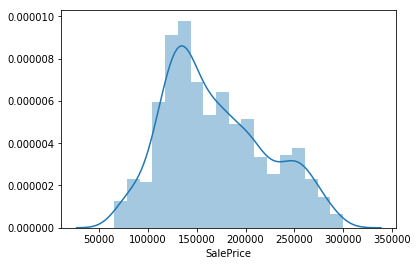

In [45]:
from sklearn.ensemble import RandomForestRegressor
train = preprocessed_train_data
test = preprocessed_test_data
predictors = list(train.columns)
predictors.remove("SalePrice")
predictors.remove("Id")

reg = RandomForestRegressor(min_samples_leaf=5)
reg.fit(train[predictors], train["SalePrice"])

predictions = reg.predict(test[predictors])
preprocessed_test_data['SalePrice'] = predictions
submit_rf = preprocessed_test_data[['Id','SalePrice']]
submit_rf.to_csv("RF.csv", sep = ',', index=False)

sns.distplot(submit_rf['SalePrice'])

print("skewness: %f" % submit_rf['SalePrice'].skew())
print("kurtosis: %f" %submit_rf['SalePrice'].kurtosis())

# All models are submitted to kaggle which gives the following root mean square log error

## Linear Regression = 0.20576
## Decision Tree = 0.23942
## Random Forest = 0.21915


# Thank You!!